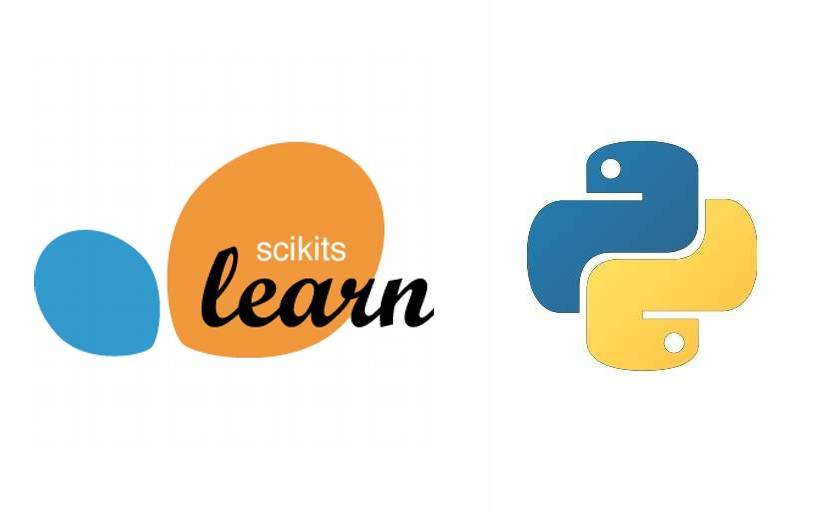

# BID01 - Pengenalan Data Science

Nama: Angelique Keyko Haryono

NRP: 2073016

### Week 6 - Regression dengan K-Nearest Neighbours

1. Sample Dataset
2. Features dan Target
3. Preprocess Dataset: Konversi Label Menjadi Numerik Biner
4. Training KNN Regression Model
5. Prediksi Berat Badan

KNN merupakan model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat. Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks. Untuk mengetahui mengenai KKN, kita bisa membuka link referensi berikut:
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

#### Sample Dataset

Pada contoh ini, kita akan membentuk dataset dengan format pandas dataframe yang berisi daftar tinggi dan berat badan partisipan beserta jenis kelaminnya.

In [2]:
# mengimport modul pandas
import pandas as pd

# menyiapkan dictionary dimana setiap keynya akan berasosiasi dengan list
sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178], # features
    'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],           # target
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', # features
        'wanita'
    ]
}

# membentuk object dataframe dari dictionary yang sudah dibentuk
sensus_df = pd.DataFrame(sensus)

# menampung object dataframe yang dibentuk dalam variable sensus_df
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


#### Features dan Target

Kita akan mengelompokan sekumpulan nilai features dan nilai target dari dataset kita. Kita akan mengonversikan data tinggi badan dan jenis kelamin ke dalam numpy array, hasil konversi ini akan ditampung dalam variable X_train. Data berat badan juga akan dikonversikan ke dalam numpy array, hasil konversi ini akan ditampung dalam variable y_train. 

In [3]:
# mengimport modul numpy
import numpy as np

# melakukan konversi menjadi numpy array
X_train = np.array(sensus_df[['tinggi', 'jk']]) # sekumpulan nilai features
y_train = np.array(sensus_df['berat'])          # sekumpulan nilai target

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [178 'wanita']]

y_train: [64 86 84 80 49 59 67 54 67]


#### Preprocess Dataset: Konversi Label Menjadi Numerik Biner

Jika kita melihat nilai output diatas, nilai features sudah siap untuk digunakan dalam proses training. Tetapi nilai target yang kita miliki masih bertipe data String. Kita harus mengubah tipe data String ini menjadi numerik. Kita bisa memanfaatkan LabelBinarizer. 

Sebelum itu kita harus melakukan prses transpose yaitu mengubah posisi baris menjadi kolom dan kolom menjadi baris. Baris mengindikasikan instance dan kolom mengindikasikan features. 

In [4]:
# melakukan proses transpose
X_train_transposed = np.transpose(X_train)

print(f'X_train:\n{X_train}\n')
print(f'X_train_transposed:\n{X_train_transposed}')

X_train:
[[158 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [155 'wanita']
 [163 'wanita']
 [180 'wanita']
 [158 'wanita']
 [178 'wanita']]

X_train_transposed:
[[158 170 183 191 155 163 180 158 178]
 ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita'
  'wanita']]


In [6]:
# mengimport LabelBinarizer
from sklearn.preprocessing import LabelBinarizer

# membentuk object dari class LabelBinarizer
lb = LabelBinarizer()

# memanfaatkan object LabelBinarizer untuk melakukan transformasi data dalam jenis kelamin
jk_binarised = lb.fit_transform(X_train_transposed[1])

print(f'jk: {X_train_transposed[1]}\n')
print(f'jk_binarised:\n{jk_binarised}')

# data bernilai 0 merepresentasikan data pria. 
# data bernilai 1 merepresentasikan data wanita.

jk: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']

jk_binarised:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


Hasil transformasi data dengan LabelBinarizer untuk sekumpulan nilai target tersimpan dalam format array 2 dimensi. Oleh karena itu kita harus mengubahnya kembali menjadi array 1 dimensi.

In [7]:
# mengubah menjadi array 1 dimensi
jk_binarised = jk_binarised.flatten()
jk_binarised

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

Nilai yang sudah ditransformasikan, akan kita tampung lagi dalam variabel `X_train_transposed`. 

In [8]:
# melakukan proses transpose
X_train_transposed[1] = jk_binarised
X_train = X_train_transposed.transpose()

print(f'X_train_transposed:\n{X_train_transposed}\n')
print(f'X_train:\n{X_train}')

X_train_transposed:
[[158 170 183 191 155 163 180 158 178]
 [0 0 0 0 1 1 1 1 1]]

X_train:
[[158 0]
 [170 0]
 [183 0]
 [191 0]
 [155 1]
 [163 1]
 [180 1]
 [158 1]
 [178 1]]


#### Training KNN Regression Model

Kita akan melakukan training dataset menggunakan KNN Regression Model. Yang perlu kita lakukan adalah mengimport `KNeighborsRegressor`. `KNeighborsRegressor` memiliki 1 parameter yang harus kita definisikan yaitu parameter `K`. Parameter `K` berguna untuk menentukan jumlah tetangga terdekat yang akan dilibatkan untuk proses prediksi. Dalam pembentukan object class `KNeighborsRegressor`, terdapat 1 parameter yaitu `n_neighbors`. Pada contoh ini parameter tersebut diisi nilai `K`. 

In [10]:
# import estimator class KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

K = 3

# membentuk object dari class KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=K)

# melakukan training data set 
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

#### Prediksi Berat Badan

Setelah melakukan training, kita bisa melakukan prediksi berat badan berdasarkan data tinggi dan data jenis kelamin. 

In [15]:
# menyiapkan data baru untuk prediksi.
# kita juga membentuk features menjadi numpy array dan melakukan reshape menjadi array 2 dimensi.
X_new = np.array([155, 1]).reshape(1, -1)
X_new

array([[155,   1]])

In [16]:
# melakukan prediksi model dengan memanfaatkan model KNeighborsRegressor yang sudah di training
y_pred = model.predict(X_new)
y_pred

array([55.66666667])